In [8]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
import scipy
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,RocCurveDisplay,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing import MinMaxScaler
data=pd.read_csv("D:/jajroudi PH.D/other project/physiotherapy/revized data.csv")


#print("check for null",data.isnull().sum())
print(data.columns)
data.info()


Index(['Age', 'Sex', 'BMI', 'Pain', 'Painfulknee', 'DLL', 'Time', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST', 'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting', 'GS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            162 non-null    int64  
 1   Sex            162 non-null    object 
 2   BMI            162 non-null    float64
 3   Pain           162 non-null    int64  
 4   Painfulknee    161 non-null    object 
 5   DLL            162 non-null    object 
 6   Time           162 non-null    int64  
 7   Palpation      162 non-null    object 
 8   Resisted.IC    162 non-null    object 
 9   Patellar.TT    162 non-null    object 
 10  Eeccentric.ST  162 non-null    object 
 11  Qangle         162 non-null    int6

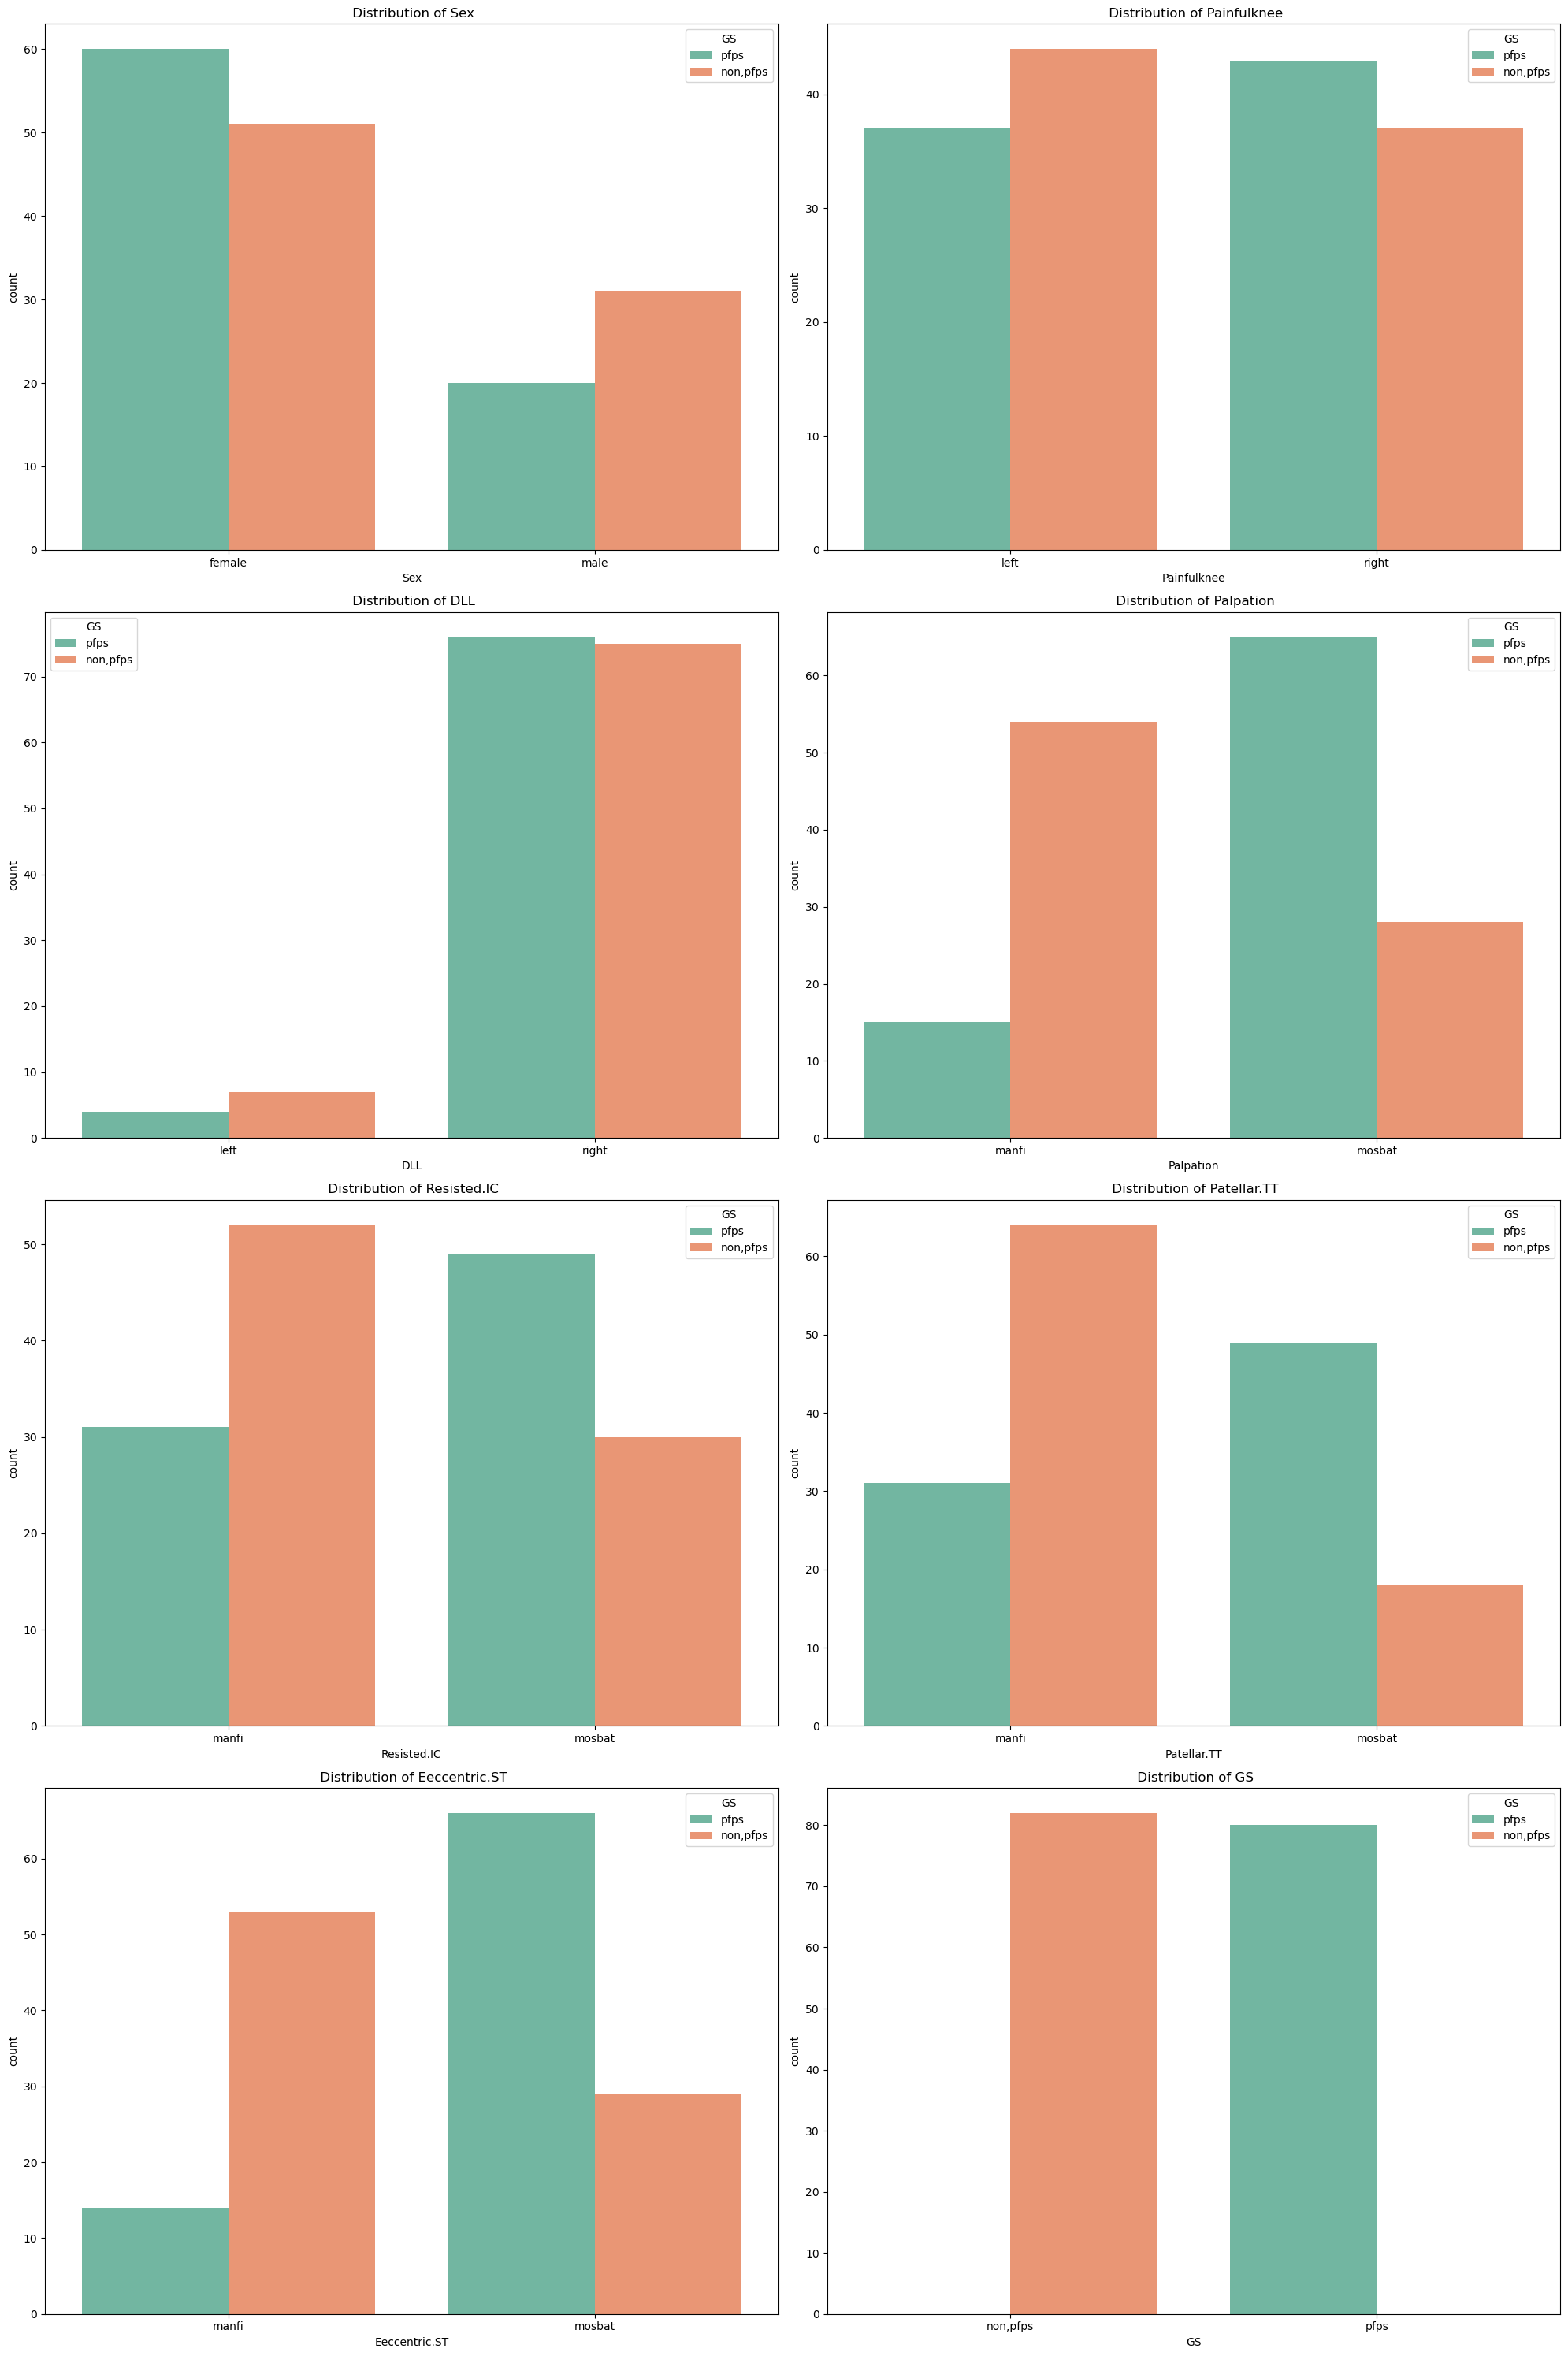

In [9]:
Columns=[ 'Sex', 'Painfulknee', 'DLL', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST',"GS"]
plt.rcParams["figure.figsize"] = [20.00, 30]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2)
i=0
for column in Columns :
    #sns.catplot(data=data, x=column, hue="CMPIE Status" , kind="count",ax=axes[i])
    sns_plot=sns.countplot(data=data,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data["GS" ],ax=axes[i//2,i%2]).set_title(f' Distribution of {column}')
    i=i+1

C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_25840\583590347.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_25840\583590347.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_25840\583590347.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data["GS" ],ax=axes[i//2

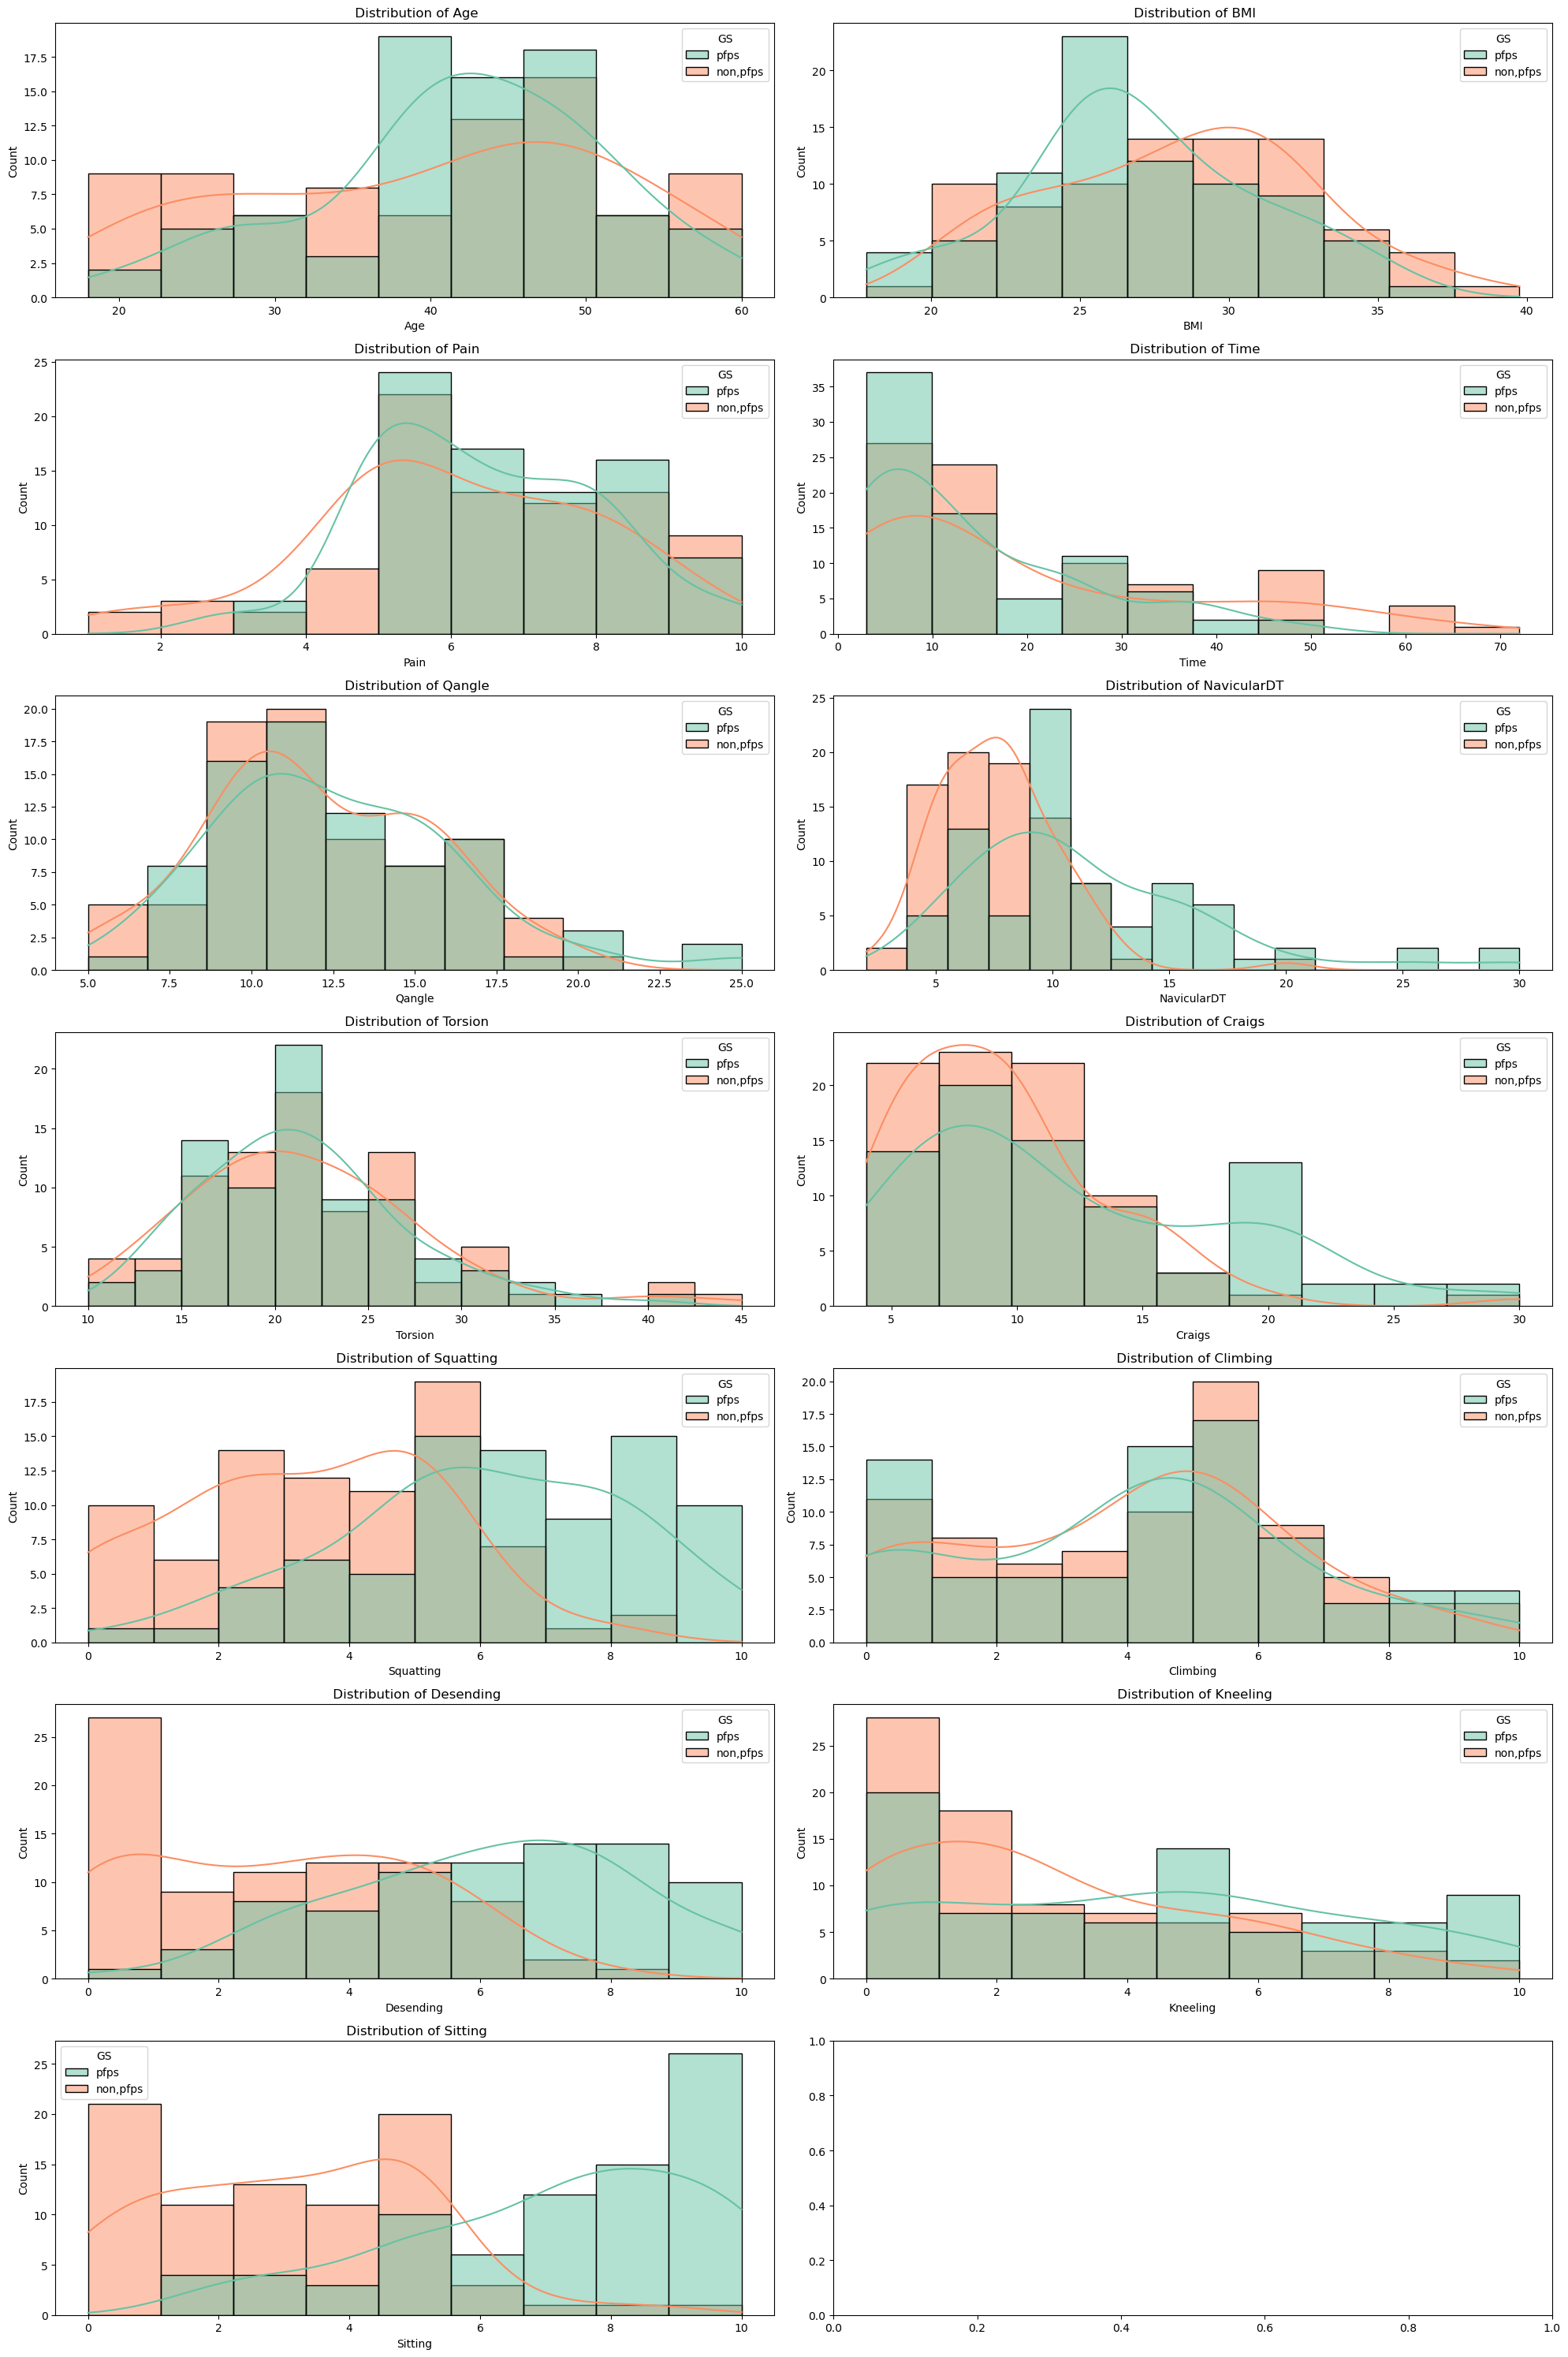

In [10]:
Columns=['Age', 'BMI',  'Pain','Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
plt.rcParams["figure.figsize"] = [20.00, 30]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2)
i=0
for column in Columns:
   
    sns_plot=sns.histplot(data=data,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
  
    i=i+1

In [11]:
from scipy.stats import kstest
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapfn=data[data["GS"]=="non,pfps"]
for i in Columns:
    print([i])
    stat,P=kstest(datapfn[i],"norm")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

['Age']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['BMI']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Pain']
Statistics=0.953, p=0.000
Sample does not look Gaussian (reject H0)
['Time']
Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)
['Qangle']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['NavicularDT']
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)
['Torsion']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Craigs']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Squatting']
Statistics=0.782, p=0.000
Sample does not look Gaussian (reject H0)
['Climbing']
Statistics=0.746, p=0.000
Sample does not look Gaussian (reject H0)
['Desending']
Statistics=0.658, p=0.000
Sample does not look Gaussian (reject H0)
['Kneeling']
Statistics=0.636, p=0.000
Sample does not look Gaussian (reject H0)
['Sitting']
Statistics=0.732, p=0.000
Sample d

In [12]:
from scipy.stats import kstest
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapf=data[data["GS"]=="pfps"]
for i in Columns:
    print([i])
    stat,P=kstest(datapf[i],"norm")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('Sample looks Gaussian (Accept H0)')
    else:
        print('Sample does not look Gaussian (Reject H0)')


['Age']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['BMI']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Pain']
Statistics=0.999, p=0.000
Sample does not look Gaussian (Reject H0)
['Time']
Statistics=0.999, p=0.000
Sample does not look Gaussian (Reject H0)
['Qangle']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['NavicularDT']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Torsion']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Craigs']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Squatting']
Statistics=0.952, p=0.000
Sample does not look Gaussian (Reject H0)
['Climbing']
Statistics=0.740, p=0.000
Sample does not look Gaussian (Reject H0)
['Desending']
Statistics=0.965, p=0.000
Sample does not look Gaussian (Reject H0)
['Kneeling']
Statistics=0.727, p=0.000
Sample does not look Gaussian (Reject H0)
['Sitting']
Statistics=0.977, p=0.000
Sample d

In [13]:
from scipy.stats import mannwhitneyu
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapf=data[data["GS"]=="pfps"]
datapfn=data[data["GS"]=="non,pfps"]
for i in Columns:
    print([i])
    stat,P=mannwhitneyu(datapf[i],datapfn[i],method="exact")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('No significant relation (Accept  H0)')
    else:
        print('significant relation  (Reject H0)')


['Age']
Statistics=3527.500, p=0.410
No significant relation (Accept  H0)
['BMI']
Statistics=2687.000, p=0.047
significant relation  (Reject H0)
['Pain']
Statistics=3614.500, p=0.265
No significant relation (Accept  H0)
['Time']
Statistics=2774.500, p=0.091
No significant relation (Accept  H0)
['Qangle']
Statistics=3475.500, p=0.516
No significant relation (Accept  H0)
['NavicularDT']
Statistics=4881.000, p=0.000
significant relation  (Reject H0)
['Torsion']
Statistics=3276.500, p=0.993
No significant relation (Accept  H0)
['Craigs']
Statistics=4036.500, p=0.011
significant relation  (Reject H0)
['Squatting']
Statistics=5308.500, p=0.000
significant relation  (Reject H0)
['Climbing']
Statistics=3231.000, p=0.871
No significant relation (Accept  H0)
['Desending']
Statistics=5501.000, p=0.000
significant relation  (Reject H0)
['Kneeling']
Statistics=4105.000, p=0.006
significant relation  (Reject H0)
['Sitting']
Statistics=5824.000, p=0.000
significant relation  (Reject H0)


In [14]:
from scipy.stats import chi2_contingency
Columns=[ 'Sex', 'Painfulknee', 'DLL', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST',"GS"]
results = {}
for col in Columns:
    print([col])
    contingency_table = pd.crosstab(data[col], data["GS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[col] = {"Test Statistic": chi2, "p-value": p}
    print('Statistics=%.3f, p=%.3f' % (chi2, p))
    alpha = 0.05
    if p > alpha:
        print('No significant relation (Accept  H0)')
    else:
        print('  significant relation(reject H0)')

['Sex']
Statistics=2.513, p=0.113
No significant relation (Accept  H0)
['Painfulknee']
Statistics=0.751, p=0.386
No significant relation (Accept  H0)
['DLL']
Statistics=0.339, p=0.560
No significant relation (Accept  H0)
['Palpation']
Statistics=34.844, p=0.000
  significant relation(reject H0)
['Resisted.IC']
Statistics=8.897, p=0.003
  significant relation(reject H0)
['Patellar.TT']
Statistics=24.191, p=0.000
  significant relation(reject H0)
['Eeccentric.ST']
Statistics=35.175, p=0.000
  significant relation(reject H0)
['GS']
Statistics=158.024, p=0.000
  significant relation(reject H0)


####SPLITTINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

In [15]:
encoder=OneHotEncoder(sparse=False,drop="first") # two state one state drop
Columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST','Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting',"GS"]
results = {}
data_for_T_T=data[[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST','Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting',"GS"]]
data_features=data_for_T_T.iloc[:,:-1]
data_features_v=data_features.values
data_tar=data_for_T_T.iloc[:,-1]
data_tar_v=data_tar.values
df_train_X, df_test_X ,df_train_Y,df_test_Y= train_test_split(data_features_v,data_tar_v, test_size=0.2, random_state=42, shuffle=True)
data_features_v.shape

(162, 16)

ONE HOT encodinggggggggggggggggggggggg for Trainning

In [16]:
encoder = OneHotEncoder(drop="first")

one_hot_encoded=encoder.fit_transform(df_train_Y.reshape(-1,1)).toarray()

data_train_Y1=pd.DataFrame(one_hot_encoded,columns=[ "GS" ])


In [17]:
encoder = OneHotEncoder(drop="first")
one_hot_encoded=encoder.fit_transform(df_train_X[:,0:5]).toarray()
newcol=encoder.get_feature_names_out ()

data_train_X1=pd.DataFrame(one_hot_encoded,columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST'])
data_train_X1.shape

(129, 5)

ONE HOT encodinggggggggggggggggggggggg for TEST

In [18]:
encoder = OneHotEncoder(drop="first")

one_hot_encoded=encoder.fit_transform(df_test_Y.reshape(-1,1)).toarray()

data_test_Y1=pd.DataFrame(one_hot_encoded,columns=[ "GS" ])

In [19]:
encoder = OneHotEncoder(drop="first")
one_hot_encoded=encoder.fit_transform(df_test_X[:,0:5]).toarray()
newcol=encoder.get_feature_names_out ()

data_test_X1=pd.DataFrame(one_hot_encoded,columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST'])

NORMALIZZZZZZZZZZZZZZZZZZZZZZZZEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE           for  trainning and test 

In [20]:

data_quan=data[['Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']]
newcol=['Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']

modelSc =  MinMaxScaler()
df= modelSc.fit(df_train_X[:,5:16])
dfX=modelSc.transform(df_train_X[:,5:16])
dfXT=modelSc.transform(df_test_X[:,5:16])
#x=np.concatenate((dfX,dfXT))
modelSc.get_feature_names_out()

data_train_X2=pd.DataFrame(dfX,columns=['Age', 'BMI','Qangle', 'NavicularDT',
     'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
      'Sitting'])

data_test_X2=pd.DataFrame(dfXT,columns=['Age', 'BMI','Qangle', 'NavicularDT',
     'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
      'Sitting'])
data_train_X2.shape

(129, 11)

####MODELING

In [21]:
result_train=pd.concat([data_train_X1, data_train_X2,data_train_Y1], axis=1)
result_test=pd.concat([data_test_X1, data_test_X2,data_test_Y1], axis=1)
###### training Class 
result_train["GS"].value_counts()
result_train.shape

(129, 17)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
X_train_f=result_train.iloc[:,:-1].values
col_feature=result_train.iloc[:,:-1].columns
Y_train_f=result_train["GS"].values
name_features = {}

# Loop through the columns in the DataFrame
for col in col_feature:
    # Check if the column is categorical
    if result_train[col].dtype == 'object':
        # Store the unique values in the dictionary
        name_features[col] = list(X[col].unique())
        
model = SVC()
hyperparameters = { "C": [1, 10, 100], "gamma": [0.01, 0.1,0.2], 'kernel': ['linear', 'rbf']}
### model.set_feature_names(list(col_feature))
###  loop for outer
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=inner_cv, scoring='roc_auc')
#best_model.set_feature_names(list(X.columns))
# Fit the model to the data
#best_model.fit(X, y, cat_features=list(cat_features.keys()))
clf.fit(X_train_f,Y_train_f )
#best_model=SVC(C=clf.best_estimator_.C,gamma=clf.best_estimator_.gamma,kernel=clf.best_estimator_.kernel)
best_model=clf.best_estimator_
#best_model

In [23]:
scores = cross_val_score(best_model, X_train_f,Y_train_f, cv=outer_cv, scoring='roc_auc')
print("Nested Cross-Validation Scores:")
print(np.mean(scores))

Nested Cross-Validation Scores:
0.9630952380952381


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix,auc
import seaborn as sns
from sklearn.metrics import  ConfusionMatrixDisplay,RocCurveDisplay
def measure_critaria(best_model,x,y):
    y_pred = best_model.predict(x)
    accuracy= accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    tn_, fp_, fn_, tp_ = confusion_matrix(y, y_pred).ravel()
    
    specificity = tn_ / (tn_ + fp_)
    sensitivity = tp_ / (tp_ + fn_)
    auc1 = roc_auc_score(y, y_pred)
    print("Test set metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print("Specificity:", specificity)
    print("sensitivity:", sensitivity)
    print("AUC:", auc1)
    cm = confusion_matrix(y, y_pred, labels=best_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
    disp.plot()
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()
    
    RocCurveDisplay.from_predictions(y, y_pred)
    plt.plot(fp_, tp_, color='darkorange', label='ROC curve (area = %0.2f)' % auc1)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for outer')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()
#plt.savefig(address+"auc__smote_stacking.png", dpi=300, bbox_inches="tight")


FORRRRRRRRRRRRRRRRRRRRR TEEEEEEEEESSSTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

Test set metrics:
Accuracy: 0.9393939393939394
Precision: 0.9411764705882353
Recall: 0.9411764705882353
F1 score: 0.9411764705882353
Specificity: 0.9375
sensitivity: 0.9411764705882353
AUC: 0.9393382352941176


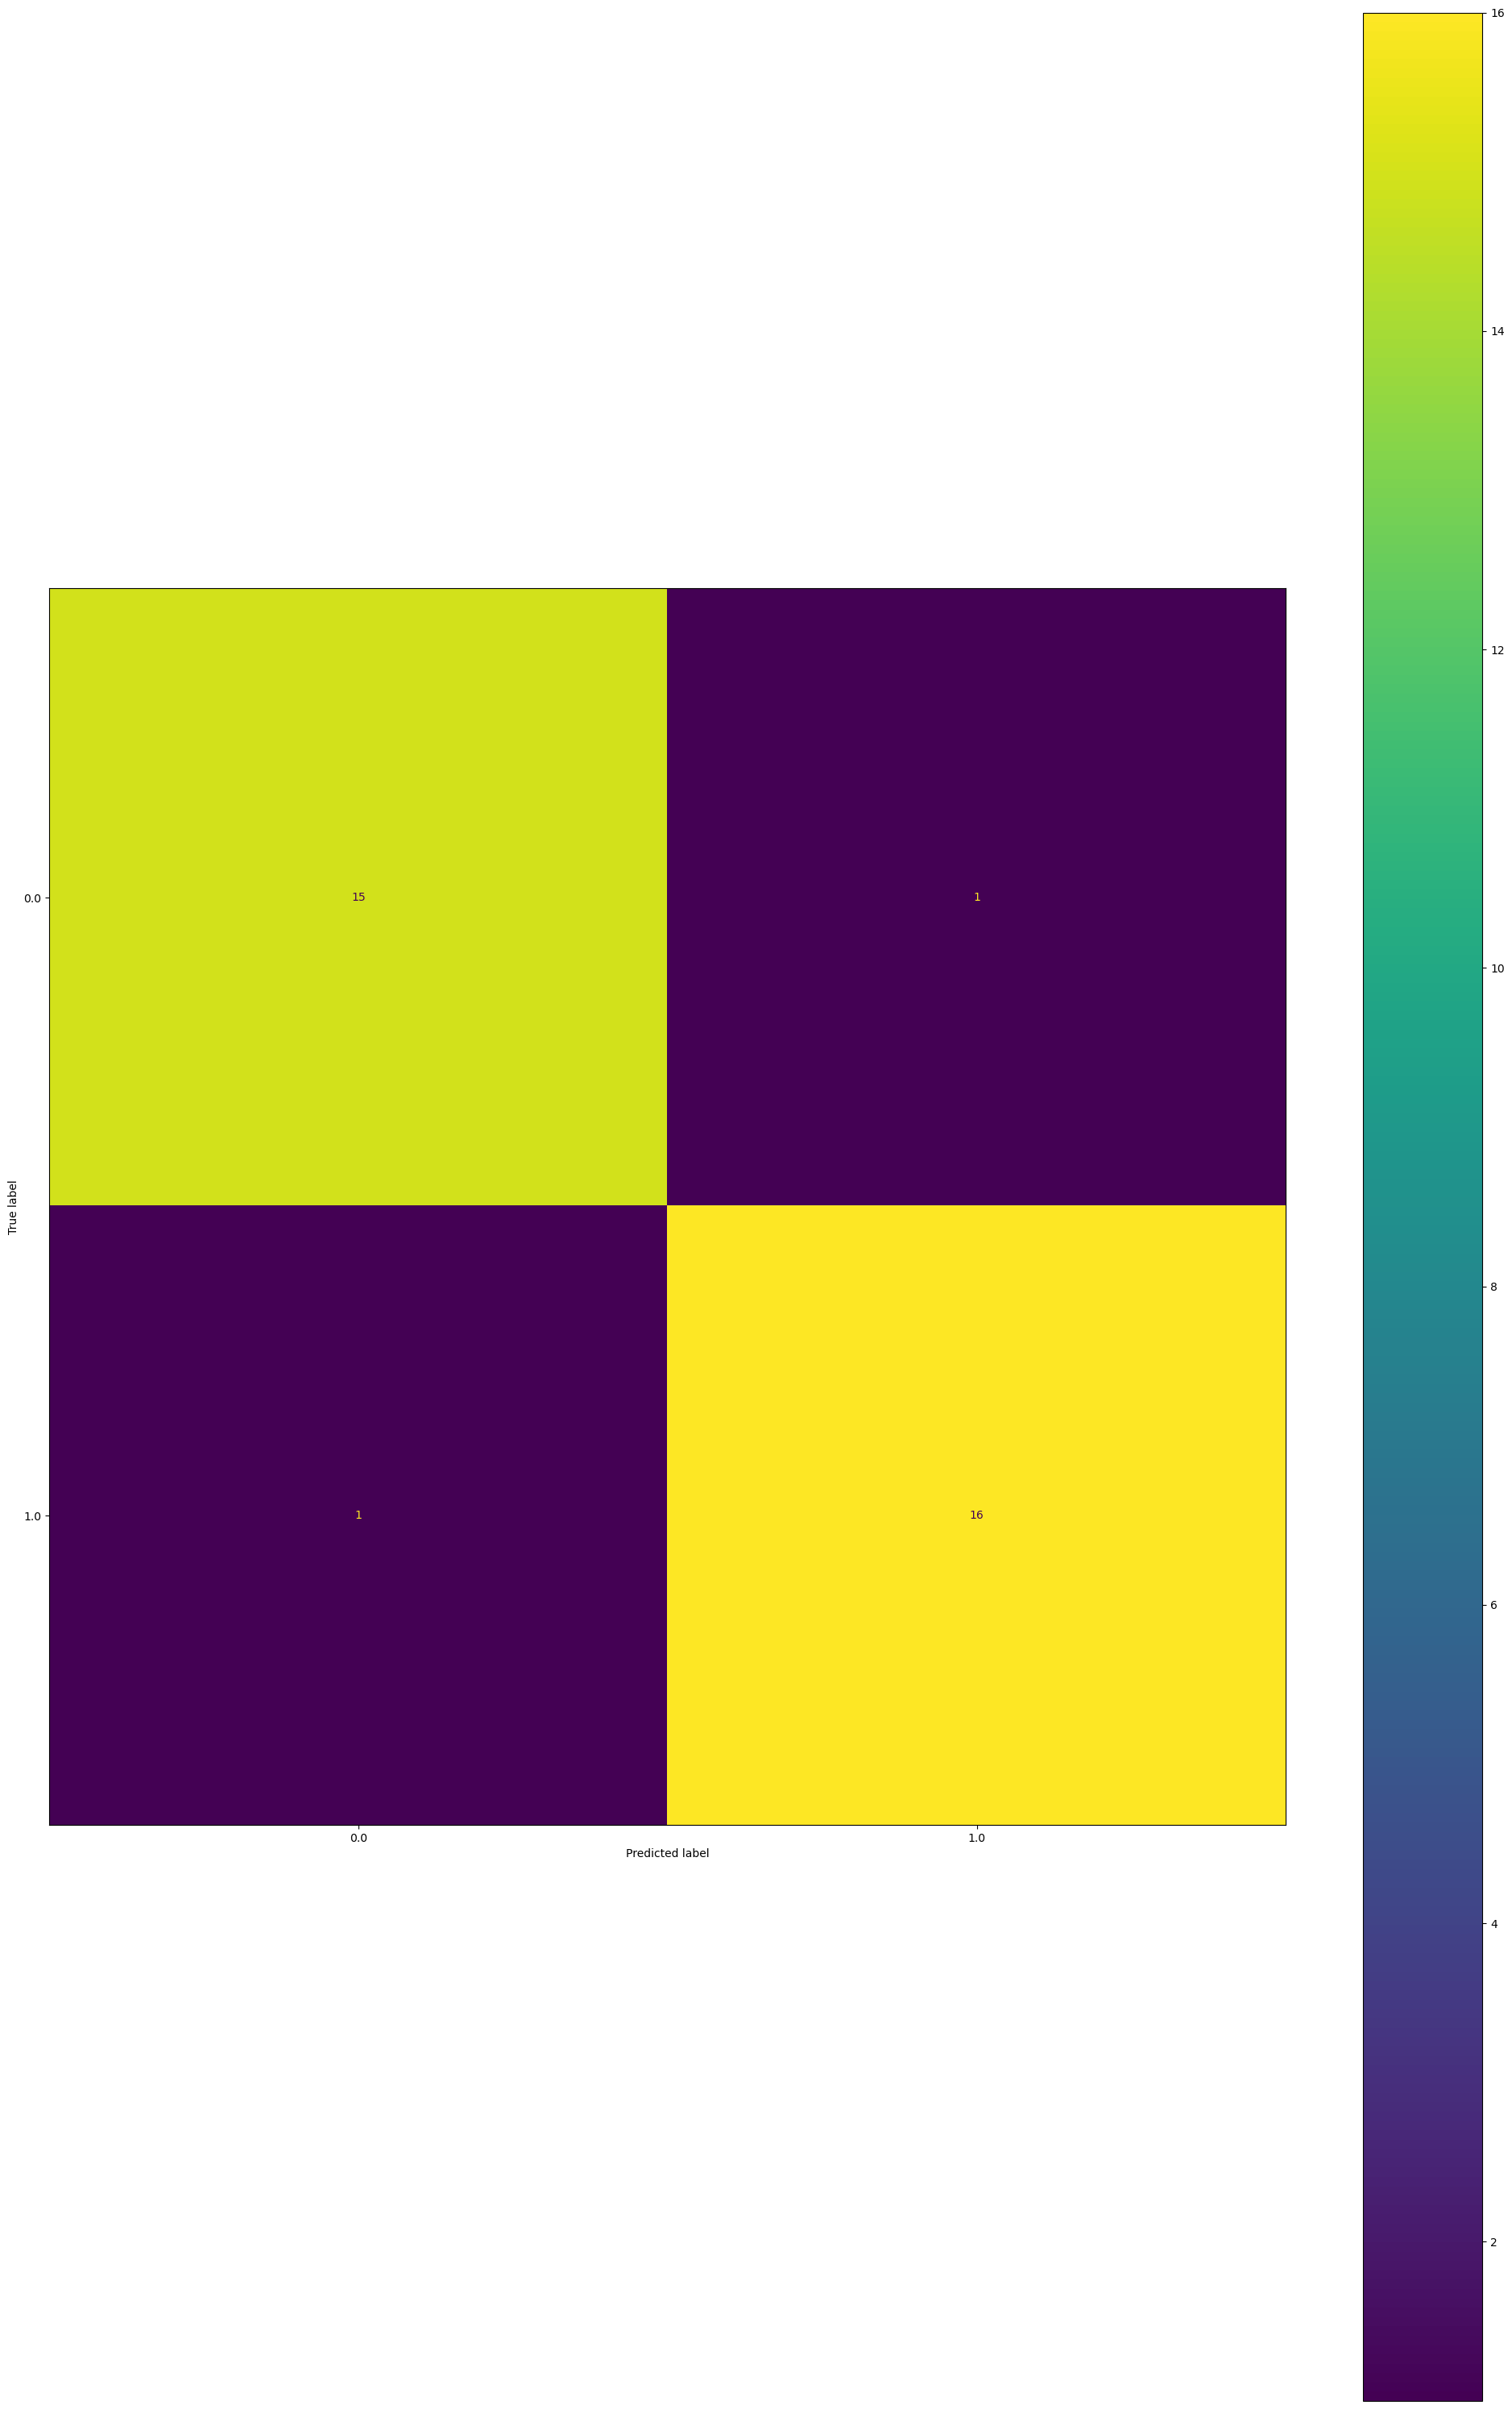

<Figure size 200x200 with 0 Axes>

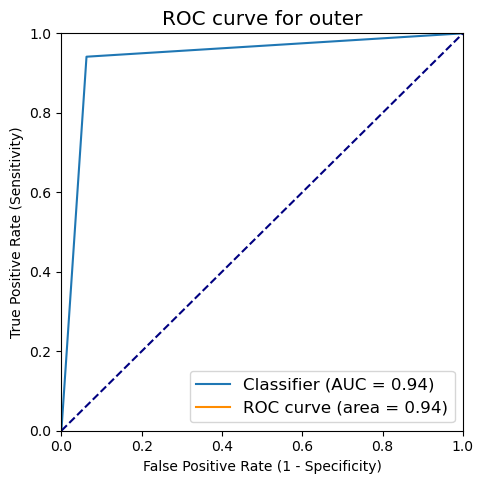

<Figure size 200x200 with 0 Axes>

In [25]:
X_test_f=result_test.iloc[:,:-1].values
Y_test_f=result_test["GS"].values
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(2, 2))
measure_critaria(best_model,X_test_f,Y_test_f)

#####learning curve

In [26]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

def LearningCurve(best_model,x,y):
    

    common_params = {
      "X": x,
      "y": y,
      "train_sizes": np.linspace(0.1, 1.0, 5),
      "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
      "score_type": "both",
      "n_jobs": 4,
      "line_kw": {"marker": "o"},
      "std_display_style": "fill_between",
      "score_name": "Accuracy",
                }


    LearningCurveDisplay.from_estimator(best_model, **common_params)
    #handles, label = ax[ax_idx].get_legend_handles_labels()
    #ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    #ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
# X and y are the input features and labels of training set, respectively
# model is the classification model to be trained
def LearningCurve(best_model,x,y,n):
    
    train_sizes, train_scores, test_scores = learning_curve(best_model,x,y, cv=n)
    # Calculate mean and standard deviation of train and test scores across CV folds
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Plot the learning curve
    plt.plot(train_sizes, train_mean, label='Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Validation')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()

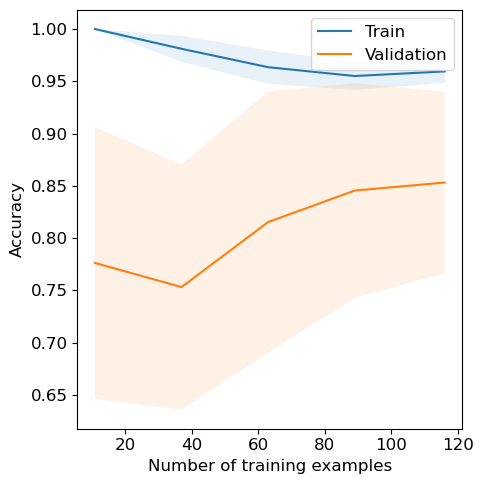

<Figure size 200x200 with 0 Axes>

In [28]:
LearningCurve(best_model,X_train_f,Y_train_f,10)

calibration model

In [29]:
# from sklearn.calibration import calibration_curve
# import matplotlib.pyplot as plt
# # y_true is the true labels for the test set, and y_probs is the predicted probabilities
# # y_true = Y_test_ft# true labels for test set

# # y_pred = best_model.predict(X_test_f)
# y_probs = y_pred # predicted probabilities for test set
# # # Calculate calibration curve
# # frac_pos, mean_pred = calibration_curve(y_true, y_probs, n_bins=10)
# # # Plot calibration curve
# # plt.plot(mean_pred, frac_pos, marker='o', linewidth=1, label='Model')
# # plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
# # plt.xlabel('Mean predicted probability')
# # plt.ylabel('Fraction of positive samples')
# # plt.legend()
# # plt.show()

####SHAPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 129/129 [02:23<00:00,  1.11s/it]


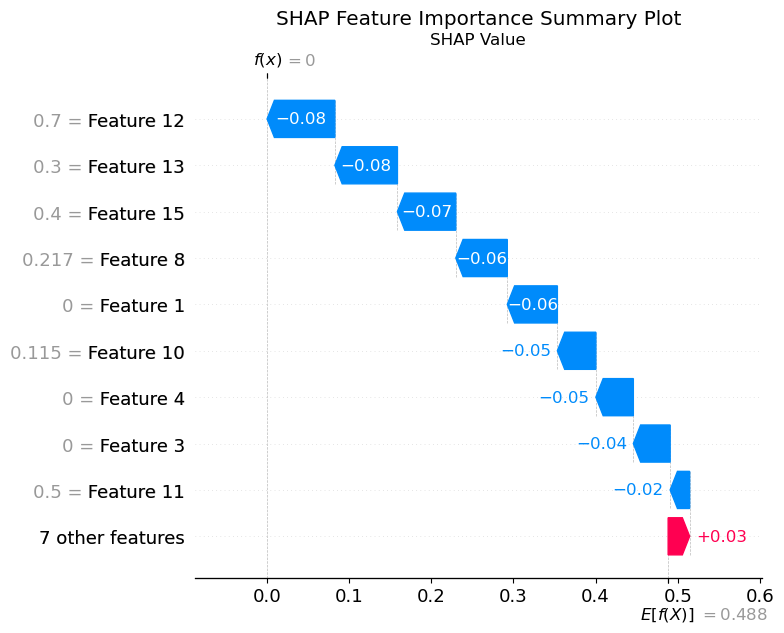

In [30]:
import shap
f=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST','Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting',"GS"]
explainer = shap.KernelExplainer(best_model.predict,X_train_f)
shap_values = explainer(X_train_f)

# Configure the appearance of the summary plot
shap.waterfall_plot(shap_values[0],show=False)

# Configure the appearance of the summary plot
#shap.summary_plot(shap_values,    X,                  plot_type="bar",                   color="dodgerblue",                   alpha=0.7,                  sort=True,                  show=False)

# Add a title to the plot
plt.title("SHAP Feature Importance Summary Plot")

# Add axis labels
plt.xlabel("SHAP Value")
plt.ylabel("Feature")

# Show the plot
plt.show()

In [31]:
shap_values

.values =
array([[-0.0205044 , -0.06098122,  0.01827684, ..., -0.07617549,
         0.00197713, -0.07106747],
       [ 0.02769006,  0.03543789,  0.01715527, ...,  0.03357497,
        -0.00286251,  0.07429425],
       [-0.02933332, -0.06514348, -0.02868441, ..., -0.19294292,
        -0.00604466, -0.00624467],
       ...,
       [ 0.15160719, -0.0923582 , -0.04354747, ...,  0.0753531 ,
         0.01237946,  0.01854347],
       [-0.01827705,  0.0145436 , -0.02051545, ..., -0.1013718 ,
        -0.00216309, -0.09361127],
       [-0.02620852, -0.06022039, -0.02800321, ..., -0.04556379,
         0.        , -0.07301821]])

.base_values =
array([0.48837209, 0.48837209, 0.48837209, 0.48837209, 0.48837209,
       0.48837209, 0.48837209, 0.48837209, 0.48837209, 0.48837209,
       0.48837209, 0.48837209, 0.48837209, 0.48837209, 0.48837209,
       0.48837209, 0.48837209, 0.48837209, 0.48837209, 0.48837209,
       0.48837209, 0.48837209, 0.48837209, 0.48837209, 0.48837209,
       0.48837209, 0.48837